# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df = df.drop(['Unnamed: 0','key'],axis=1)
df.dropna(axis=0,inplace=True)

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df['dropoff_longitude'].isnull().sum(), df['dropoff_latitude'].isnull().sum()

(0, 0)

# Compute distance between coordinates

In [9]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [10]:
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],
                             df['pickup_latitude'],df['dropoff_latitude'])

df['Distance'] = df['Distance'].astype(float).round(2)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


# Visualization - Scatter plot

### between distance and fare_amount

Text(0, 0.5, 'fare_amount')

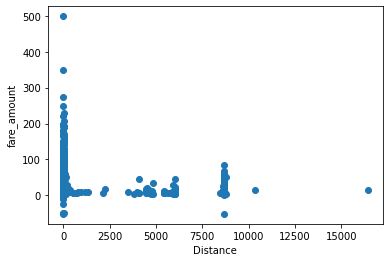

In [12]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

# Removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x29077d38668>,
 'caps': [<matplotlib.lines.Line2D at 0x29077d38c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29077d18eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x29077d46240>],
 'fliers': [<matplotlib.lines.Line2D at 0x29077d46518>],
 'means': []}

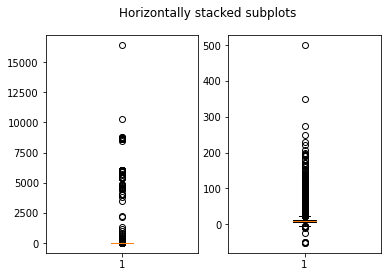

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')
ax1.boxplot(df['Distance'])
ax2.boxplot(df['fare_amount'])

In [14]:
df.drop(df[df['Distance']<=0].index, inplace=True)
df.drop(df[df['Distance']>60].index, inplace=True) # remove large distances

In [15]:
df.drop(df[df['fare_amount']<=0].index, inplace=True)

In [16]:
# non-possible data removal
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'Fare amount')

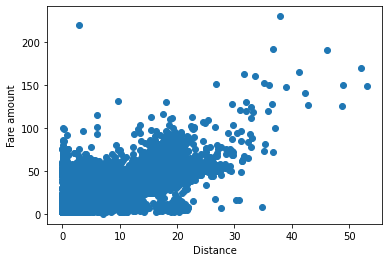

In [17]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare amount')

## Correlation

In [18]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.012070,-0.008682,0.010555,-0.008695,0.013508,0.893050
pickup_longitude,0.012070,1.000000,-0.949099,0.999883,-0.993975,0.009174,0.005337
pickup_latitude,-0.008682,-0.949099,1.000000,-0.949095,0.954759,-0.009219,0.003232
dropoff_longitude,0.010555,0.999883,-0.949095,1.000000,-0.993962,0.009168,0.004406
dropoff_latitude,-0.008695,-0.993975,0.954759,-0.993962,1.000000,-0.009266,-0.002122
passenger_count,0.013508,0.009174,-0.009219,0.009168,-0.009266,1.000000,0.007441
Distance,0.893050,0.005337,0.003232,0.004406,-0.002122,0.007441,1.000000


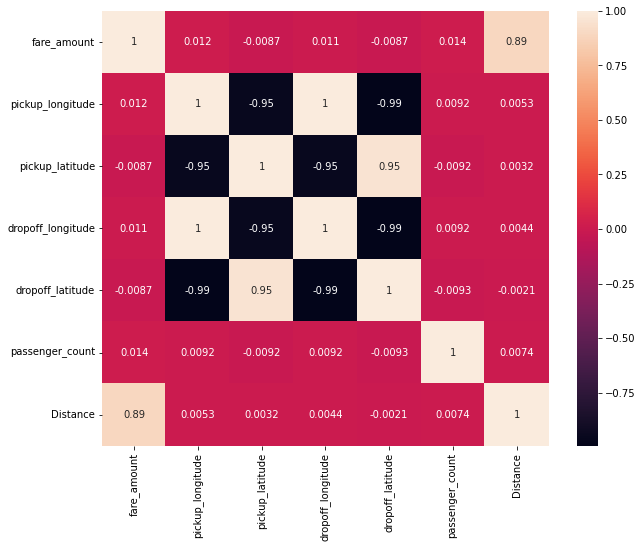

In [19]:
plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Model Building

In [20]:
X = df['Distance'].values.reshape(-1,1)  # .values.reshape(-1,1) -> due to 1D array
Y = df['fare_amount'].values.reshape(-1,1)
X.shape, Y.shape

((193481, 1), (193481, 1))

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.4011162 ]
 [-0.38006651]
 [ 0.16722527]
 ...
 [ 2.06169682]
 [ 0.33562274]
 [ 0.29352337]]
[[-0.46599576]
 [-0.24929862]
 [ 0.46746884]
 ...
 [ 2.63721838]
 [ 0.05074357]
 [ 0.57303924]]


## Splitting datasets

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((154784, 1), (38697, 1), (154784, 1), (38697, 1))

## Model training

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)

In [26]:
m,c = reg.intercept_, reg.coef_
print(reg.intercept_)
print(reg.coef_)

[3.40654989]
[[2.3539408]]


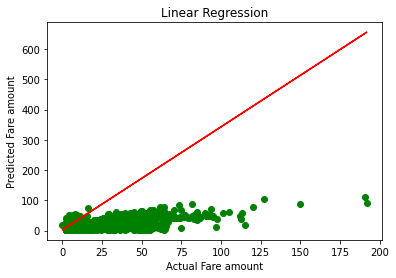

In [27]:
x = y_test
y = m*x + c
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Actual Fare amount")
plt.ylabel("Predicted Fare amount")
plt.plot(x,y,'-r')
plt.title("Linear Regression")
plt.show()

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.2783259292291937
Mean Squared Error: 17.915936115494976
Root Mean Squared Error: 4.232722069247516


# Random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(x_train, y_train.ravel())

In [33]:
prediction = rf.predict(x_test)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

17.20621807824692
4.148037858825172
